imported intial required libraries

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Visualized an image

In [2]:
#img = cv2.imread("C:/Users/vinayak/Downloads/02c7e060-d86c-4416-ba5f-78beb310f90c.jpg")
img = cv2.imread("./dataset/happy_images/00fb40ee-daf3-4dd8-b9e1-a022078189a4.jpg")
img.shape 

(207, 207, 3)

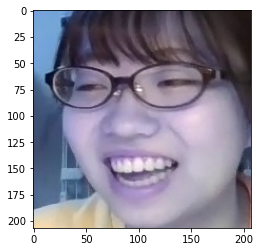

In [3]:
plt.imshow(img)

converted into black and white image

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(207, 207)

In [5]:
gray

array([[167, 169, 171, ...,  23,  23,  22],
       [167, 169, 171, ...,  23,  23,  23],
       [168, 170, 172, ...,  23,  23,  23],
       ...,
       [206, 207, 208, ..., 108, 122, 149],
       [206, 207, 209, ..., 110, 126, 150],
       [204, 206, 209, ..., 110, 126, 151]], dtype=uint8)

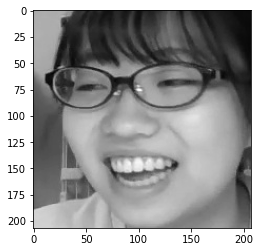

In [6]:
plt.imshow(gray, cmap='gray')

Using face cascade detected the face in image and croppped it

In [7]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [8]:
delta_scal = 1.5
while True:
    faces = face_cascade.detectMultiScale(img, 3.0-delta_scal, 2)
    if len(faces) != 0:                                                     # at least one face is detected
        break
    else:                                                                   # no face detected, re-detecting with new parameters...
        if 3.0-delta_scal > 1.01:
            delta_scal += 0.01
        else:
            break
                
faces

array([[ 10,  17, 176, 176]], dtype=int32)

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(10, 17, 176, 176)

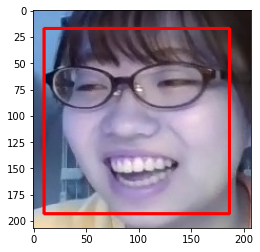

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [11]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]

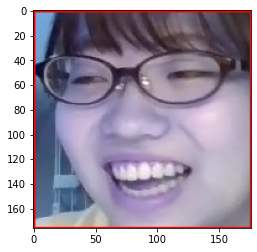

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

Define function for above process for any general image 

In [13]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    delta_scal = 1.5
    while True:
        faces = face_cascade.detectMultiScale(img, 3.0-delta_scal, 2)
        if len(faces) != 0:                                                     # at least one face is detected
            break
        else:                                                                   # no face detected, re-detecting with new parameters...
            if 3.0-delta_scal > 1.01:
                delta_scal += 0.01
            else:
                break
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        return roi_color

Appiled above function

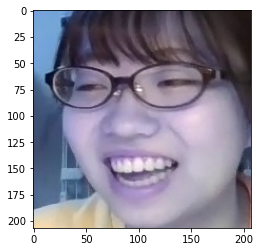

In [14]:
original_image = cv2.imread("./dataset/happy_images/00fb40ee-daf3-4dd8-b9e1-a022078189a4.jpg")
plt.imshow(original_image)

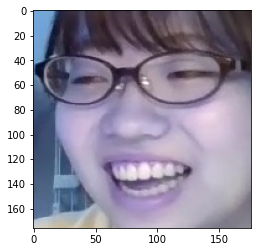

In [15]:
cropped_image = get_cropped_image("./dataset/happy_images/00fb40ee-daf3-4dd8-b9e1-a022078189a4.jpg")
plt.imshow(cropped_image)

Used "w2d" function wavelength tranformation of image

In [16]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

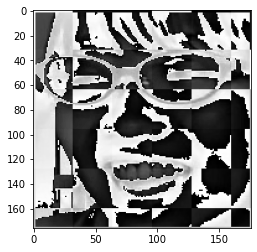

In [17]:
cropped_img = np.array(roi_color)
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

assigned test and train data in variables

In [18]:
import pandas as pd
X_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")
X_test.columns =["image", "result"]
X_train.columns =["image", "result"]

In [19]:
X_train.head()

,image,result
0,0403faa2-2d45-4779-b40a-794c220d3855,positive smile
1,1ba6784e-3684-4f76-81b7-504610a497e1,positive smile
2,675c87fb-bf50-481e-949d-07b5dc14b589,positive smile
3,02567fbb-1147-4186-8d7d-38611569fc06,NOT smile
4,02a42ebf-0683-4bc2-a616-e2ce8dc507cf,NOT smile


In [20]:
from sklearn.preprocessing import LabelEncoder
le_result = LabelEncoder()
X_train['result_n'] = le_result.fit_transform(X_train['result'])

In [21]:
X_train.head()

,image,result,result_n
0,0403faa2-2d45-4779-b40a-794c220d3855,positive smile,2
1,1ba6784e-3684-4f76-81b7-504610a497e1,positive smile,2
2,675c87fb-bf50-481e-949d-07b5dc14b589,positive smile,2
3,02567fbb-1147-4186-8d7d-38611569fc06,NOT smile,0
4,02a42ebf-0683-4bc2-a616-e2ce8dc507cf,NOT smile,0


In [22]:
X_train['result_n'].unique()

array([2, 0, 1])

In [23]:
X_train['result'].unique()

array(['positive smile', 'NOT smile', 'negative smile'], dtype=object)

Here we take all the images then get the croped face with wavelength transformation and combine this cropped color image 
And set the result of variable into the tar varible

In [24]:
X= []
tar = []
for i in range(len(X_train["image"])):
    path = "./dataset/happy_images/" + str(X_train["image"][i]) + ".jpg"
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    delta_scal = 1.5
    while True:
        faces = face_cascade.detectMultiScale(img, 3.0-delta_scal, 2)
        if len(faces) != 0:                                                     # at least one face is detected
            break
        else:                                                                   # no face detected, re-detecting with new parameters...
            if 3.0-delta_scal > 1.01:
                delta_scal += 0.01
            else:
                break
    if len(faces) != 0 :
        a = X_train["result_n"][i]
        tar = tar + [a]
        (x,y,w,h) = faces[0]
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        for (x,y,w,h) in faces:
            face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = face_img[y:y+h, x:x+w]
        cropped_img = np.array(roi_color)
        scalled_img = cv2.resize(cropped_img, (32, 32))
        img_har = w2d(scalled_img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        
   
    

In [25]:
X = np.array(X).reshape(len(X),len(X[0])).astype(float)
X.shape

(4789, 4096)

In [26]:
len(tar)

4789

imported required libraries

In [27]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [28]:
X_tr, X_te, y_tr, y_te = train_test_split(X, tar, random_state=0)

In [29]:
sc = StandardScaler()
X_te = sc.fit_transform(X_te)
X_tr = sc.fit_transform(X_tr)

Define the model 1 and predicted the results then checked accuracy

In [30]:
model = SVC(kernel = 'rbf', C = 10)
model.fit(X_tr, y_tr)
model.score(X_te,y_te)

0.7253756260434057

In [31]:
print(classification_report(y_te, model.predict(X_te)))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       825
           1       0.16      0.06      0.09       120
           2       0.61      0.38      0.47       253

    accuracy                           0.73      1198
   macro avg       0.51      0.46      0.47      1198
weighted avg       0.67      0.73      0.69      1198



In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [33]:
X_test.head()

,image,result
0,1e53ec28-b4c0-4eef-ad91-4940f535d354,NOT smile
1,05f0d520-8e85-4490-a160-5a346fc21fd3,positive smile
2,0adf2567-b325-47a8-a2c9-83b34c021163,NOT smile
3,0df7e500-a1d0-44dd-923d-25809fa38611,NOT smile
4,03d812cd-27be-41b5-b2a1-856e4d1b66ab,NOT smile


In [34]:
from sklearn.preprocessing import LabelEncoder
le_result = LabelEncoder()
X_test['result_n'] = le_result.fit_transform(X_test['result'])

now on the test data, get the croped face with wavelength transformation and combine this cropped color image

In [35]:
X_t= []
act = []
for i in range(len(X_test["image"])):
    path = "./dataset/happy_images/" + str(X_train["image"][i]) + ".jpg"
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    delta_scal = 1.5
    while True:
        faces = face_cascade.detectMultiScale(img, 3.0-delta_scal, 2)
        if len(faces) != 0:                                                     # at least one face is detected
            break
        else:                                                                   # no face detected, re-detecting with new parameters...
            if 3.0-delta_scal > 1.01:
                delta_scal += 0.01
            else:
                break
    if len(faces) != 0 :
        a = X_test["result_n"][i]
        act = act + [a]
        (x,y,w,h) = faces[0]
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        for (x,y,w,h) in faces:
            face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = face_img[y:y+h, x:x+w]
        cropped_img = np.array(roi_color)
        scalled_img = cv2.resize(cropped_img, (32, 32))
        img_har = w2d(scalled_img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X_t.append(combined_img)

In [36]:
X_t = np.array(X_t).reshape(len(X_t),4096).astype(float)
X_t.shape

(1593, 4096)

In [37]:
X_t = sc.fit_transform(X_t)

In [38]:
pred = model.predict(X_t)

In [39]:
pred

array([2, 2, 2, ..., 0, 0, 1])

acccuracy predicted during testing of model

In [40]:
Count = 0
for i in range(len(pred)):
    if pred[i] == act[i]:
        Count = Count + 1
print(Count/len(pred))

0.5574387947269304


In [41]:
print(classification_report(act,pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1113
           1       0.08      0.08      0.08       142
           2       0.24      0.21      0.22       338

    accuracy                           0.56      1593
   macro avg       0.34      0.34      0.34      1593
weighted avg       0.55      0.56      0.55      1593



<AxesSubplot:>

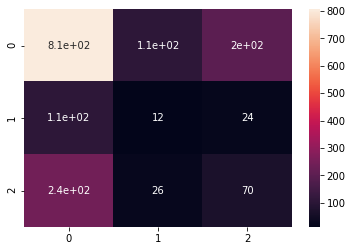

In [42]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(act, pred)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [43]:
print(classification_report(y_te, model.predict(X_te)))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       825
           1       0.16      0.06      0.09       120
           2       0.61      0.38      0.47       253

    accuracy                           0.73      1198
   macro avg       0.51      0.46      0.47      1198
weighted avg       0.67      0.73      0.69      1198



In [44]:
model2 = SVC(kernel = "rbf")

In [45]:
model2.fit(X_tr,y_tr)
model2.score(X_te,y_te)

0.7195325542570952

In [46]:
print(classification_report(y_te, model2.predict(X_te)))

              precision    recall  f1-score   support

           0       0.72      0.99      0.83       825
           1       0.00      0.00      0.00       120
           2       0.75      0.17      0.28       253

    accuracy                           0.72      1198
   macro avg       0.49      0.39      0.37      1198
weighted avg       0.65      0.72      0.63      1198



C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Define the model 2 and predicted the results then checked accuracy

In [47]:
pred2 = model2.predict(X_t)
Count = 0
for i in range(len(pred2)):
    if pred2[i] == act[i]:
        Count = Count + 1
print(Count/len(pred))

0.6572504708097928


In [48]:
print(classification_report(act, pred2))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79      1113
           1       0.00      0.00      0.00       142
           2       0.22      0.09      0.12       338

    accuracy                           0.66      1593
   macro avg       0.31      0.33      0.31      1593
weighted avg       0.53      0.66      0.58      1593



<AxesSubplot:>

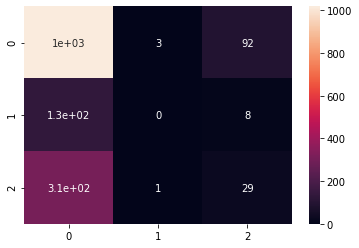

In [49]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(act, pred2)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

imported some more classification models

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Define the model 3 and predicted the results then checked accuracy

In [51]:
model3 = RandomForestClassifier()
model3.fit(X_tr,y_tr)

RandomForestClassifier()

In [52]:
pred3 = model3.predict(X_t)
Count = 0
for i in range(len(pred2)):
    if pred3[i] == act[i]:
        Count = Count + 1
print(Count/len(pred))

0.5800376647834274


In [53]:
print(classification_report(y_te, model3.predict(X_te)))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       825
           1       0.00      0.00      0.00       120
           2       0.78      0.10      0.18       253

    accuracy                           0.71      1198
   macro avg       0.50      0.37      0.33      1198
weighted avg       0.65      0.71      0.61      1198



C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
print(classification_report(act, pred3))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1113
           1       0.09      0.08      0.08       142
           2       0.24      0.18      0.20       338

    accuracy                           0.58      1593
   macro avg       0.34      0.34      0.34      1593
weighted avg       0.55      0.58      0.56      1593



<AxesSubplot:>

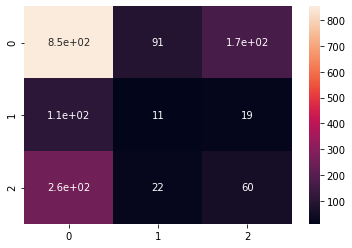

In [55]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(act, pred3)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

Define the model 4 and predicted the results then checked accuracy

In [56]:
model4 =LogisticRegression()
model4.fit(X_tr,y_tr)
pred4 = model4.predict(X_t)
Count = 0
for i in range(len(pred4)):
    if pred4[i] == act[i]:
        Count = Count + 1
print(Count/len(pred))

0.5317011927181419


C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
print(classification_report(act, pred4))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69      1113
           1       0.08      0.10      0.09       142
           2       0.24      0.22      0.23       338

    accuracy                           0.53      1593
   macro avg       0.34      0.33      0.33      1593
weighted avg       0.54      0.53      0.54      1593



In [58]:
print(classification_report(y_te, model4.predict(X_te)))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       825
           1       0.14      0.14      0.14       120
           2       0.44      0.38      0.41       253

    accuracy                           0.64      1198
   macro avg       0.45      0.44      0.44      1198
weighted avg       0.64      0.64      0.64      1198



<AxesSubplot:>

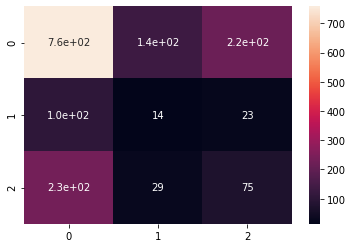

In [59]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(act, pred4)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

Define the model 5 and predicted the results then checked accuracy

In [60]:
model5 = DecisionTreeClassifier()
model5.fit(X_tr,y_tr)
pred5 = model5.predict(X_t)
Count = 0
for i in range(len(pred5)):
    if pred5[i] == act[i]:
        Count = Count + 1
print(Count/len(pred))

0.5109855618330195


In [61]:
print(classification_report(act, pred5))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1113
           1       0.07      0.10      0.08       142
           2       0.23      0.24      0.23       338

    accuracy                           0.51      1593
   macro avg       0.33      0.33      0.33      1593
weighted avg       0.54      0.51      0.52      1593



In [62]:
print(classification_report(y_te, model5.predict(X_te)))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       825
           1       0.10      0.12      0.11       120
           2       0.28      0.32      0.30       253

    accuracy                           0.54      1198
   macro avg       0.36      0.37      0.37      1198
weighted avg       0.56      0.54      0.55      1198



<AxesSubplot:>

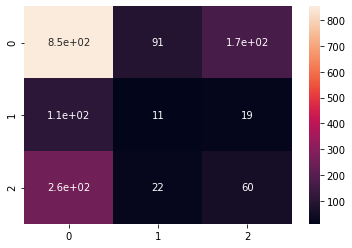

In [63]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(act, pred3)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)